# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    # enumerate參數為可遍歷/可叠代的對象(如列表、字符串)多用於在for循環中得到計數，利用它可以同時獲得索引和值
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    
    return model

In [6]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256

In [7]:
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
def Training_model(ch, lr, results):
    #for lr in LEARNING_RATE:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with LR = %.6f" % (lr))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        # choise optimizer
        if(ch == 0):
            optimizer = keras.optimizers.SGD(lr=lr, nesterov=1, momentum=0.95, decay=0.0)
        elif(ch == 1):
            optimizer = keras.optimizers.RMSprop(lr=lr, epsilon=None, decay=0.0)
        elif(ch == 2):
            optimizer = keras.optimizers.Adagrad(lr=lr, epsilon=None, decay=0.0)
        else:
            optimizer = keras.optimizers.Adam(lr=lr, epsilon=None, decay=0.0)
   
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    
        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)
        
        
        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]
        
        exp_name_tag = "exp-lr-%s" % str(lr)
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""

def Draw_Result(results):
    color_bar = ["r", "g", "b", "y", "m", "k"]
    
    plt.figure(figsize=(8,6))
    for i, cond in enumerate(results.keys()):
        plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
        plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
    plt.title("Loss")
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(8,6))
    for i, cond in enumerate(results.keys()):
        plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
        plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
    plt.title("Accuracy")
    plt.legend()
    plt.show()

In [9]:
results_sgd = {}
for lr in LEARNING_RATE:
    ch = 0
    Training_model(ch, lr, results_sgd)

W0718 01:08:33.228582 13508 deprecation_wrapper.py:119] From D:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0718 01:08:33.228582 13508 deprecation_wrapper.py:119] From D:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0718 01:08:33.241548 13508 deprecation_wrapper.py:119] From D:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0718 01:08:33.242544 13508 deprecation_wrapper.py:119] From D:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0718 01:08:33.243544 13508 deprecation_wrapper.py:119] From D:\Anaconda3\li

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

50000/50000 [==============================] - 4s 89us/step - loss: 1.8335 - acc: 0.3454 - val_loss: 1.7635 - val_acc: 0.3647
Epoch 2/50
50000/50000 [==============================] - 4s 84us/step - loss: 1.6090 - acc: 0.4296 - val_loss: 1.5589 - val_acc: 0.4499
Epoch 3/50
50000/50000 [==============================] - 4s 84us/step - loss: 1.5156 - acc: 0.4626 - val_loss: 1.5179 - val_acc: 0.4631
Epoch 4/50
50000/50000 [==============================] - 4s 84us/step - loss: 1.4574 - acc: 0.4823 - val_loss: 1.4676 - val_acc: 0.4810
Epoch 5/50
50000/50000 [==============================] - 4s 84us/step - loss: 1.4081 - acc: 0.4983 - val_loss: 1.4419 - val_acc: 0.4860
Epoch 6/50
50000/50000 [==============================] - 4s 84us/step - loss: 1.3693 - acc: 0.5113 - val_loss: 1.6385 - val_acc: 0.4340
Epoch 7/50
50000/50000 [==============================] - 4s 84us/step - loss: 1.3375 - acc: 0.5230 - val_loss: 1.4061 - val_acc: 0.4971
Epoch 8/50
50000/50000 [============================

Epoch 3/50
50000/50000 [==============================] - 4s 84us/step - loss: 1.7280 - acc: 0.3920 - val_loss: 1.6909 - val_acc: 0.4082
Epoch 4/50
50000/50000 [==============================] - 4s 84us/step - loss: 1.6666 - acc: 0.4136 - val_loss: 1.6418 - val_acc: 0.4259
Epoch 5/50
50000/50000 [==============================] - 4s 84us/step - loss: 1.6177 - acc: 0.4328 - val_loss: 1.5994 - val_acc: 0.4434
Epoch 6/50
50000/50000 [==============================] - 4s 84us/step - loss: 1.5793 - acc: 0.4463 - val_loss: 1.5739 - val_acc: 0.4435
Epoch 7/50
50000/50000 [==============================] - 4s 84us/step - loss: 1.5447 - acc: 0.4597 - val_loss: 1.5516 - val_acc: 0.4587
Epoch 8/50
50000/50000 [==============================] - 4s 84us/step - loss: 1.5143 - acc: 0.4686 - val_loss: 1.5221 - val_acc: 0.4598
Epoch 9/50
50000/50000 [==============================] - 4s 84us/step - loss: 1.4873 - acc: 0.4783 - val_loss: 1.5211 - val_acc: 0.4647
Epoch 10/50
50000/50000 [================

50000/50000 [==============================] - 4s 86us/step - loss: 2.0088 - acc: 0.3026 - val_loss: 1.9824 - val_acc: 0.3125
Epoch 5/50
50000/50000 [==============================] - 4s 87us/step - loss: 1.9604 - acc: 0.3204 - val_loss: 1.9405 - val_acc: 0.3289
Epoch 6/50
50000/50000 [==============================] - 4s 86us/step - loss: 1.9237 - acc: 0.3323 - val_loss: 1.9093 - val_acc: 0.3442
Epoch 7/50
50000/50000 [==============================] - 4s 86us/step - loss: 1.8951 - acc: 0.3401 - val_loss: 1.8841 - val_acc: 0.3484
Epoch 8/50
50000/50000 [==============================] - 4s 86us/step - loss: 1.8723 - acc: 0.3468 - val_loss: 1.8649 - val_acc: 0.3506
Epoch 9/50
50000/50000 [==============================] - 4s 87us/step - loss: 1.8540 - acc: 0.3533 - val_loss: 1.8485 - val_acc: 0.3587
Epoch 10/50
50000/50000 [==============================] - 4s 87us/step - loss: 1.8381 - acc: 0.3567 - val_loss: 1.8333 - val_acc: 0.3637
Epoch 11/50
50000/50000 [==========================

50000/50000 [==============================] - 4s 86us/step - loss: 2.2174 - acc: 0.1975 - val_loss: 2.2093 - val_acc: 0.2053
Epoch 6/50
50000/50000 [==============================] - 4s 87us/step - loss: 2.2014 - acc: 0.2109 - val_loss: 2.1939 - val_acc: 0.2180
Epoch 7/50
50000/50000 [==============================] - 5s 93us/step - loss: 2.1865 - acc: 0.2225 - val_loss: 2.1795 - val_acc: 0.2297
Epoch 8/50
50000/50000 [==============================] - 4s 90us/step - loss: 2.1725 - acc: 0.2308 - val_loss: 2.1661 - val_acc: 0.2390
Epoch 9/50
50000/50000 [==============================] - 4s 87us/step - loss: 2.1595 - acc: 0.2379 - val_loss: 2.1537 - val_acc: 0.2449
Epoch 10/50
50000/50000 [==============================] - 4s 87us/step - loss: 2.1474 - acc: 0.2449 - val_loss: 2.1421 - val_acc: 0.2494
Epoch 11/50
50000/50000 [==============================] - 4s 87us/step - loss: 2.1362 - acc: 0.2510 - val_loss: 2.1313 - val_acc: 0.2547
Epoch 12/50
50000/50000 [=========================

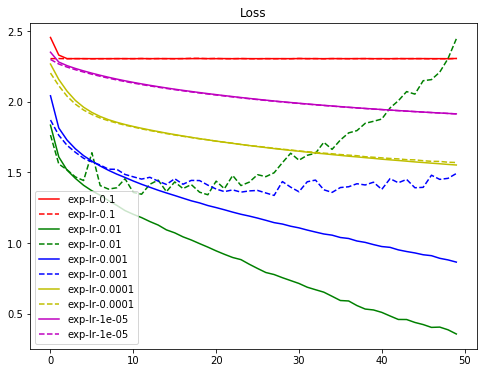

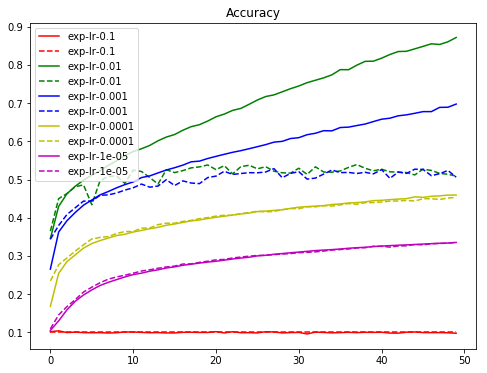

In [12]:
Draw_Result(results_sgd)

In [13]:
results_RMSprop = {}
for lr in LEARNING_RATE:
    ch = 1
    Training_model(ch, lr, results_RMSprop)

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 5s 104us/step - loss: 14.4424 - acc: 0.1003 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 5s 99us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 5s 100us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 5s 99us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 5s 102us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 5s 100us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 5s 98us/step - loss: 14.5063 - acc: 0.1000 - val_loss:

50000/50000 [==============================] - 5s 104us/step - loss: 2.3404 - acc: 0.2148 - val_loss: 1.9375 - val_acc: 0.2959
Epoch 2/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.8750 - acc: 0.3230 - val_loss: 1.9141 - val_acc: 0.3098
Epoch 3/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.7753 - acc: 0.3616 - val_loss: 2.0630 - val_acc: 0.2839
Epoch 4/50
50000/50000 [==============================] - 5s 101us/step - loss: 1.7073 - acc: 0.3884 - val_loss: 1.7148 - val_acc: 0.3999
Epoch 5/50
50000/50000 [==============================] - 5s 101us/step - loss: 1.6438 - acc: 0.4137 - val_loss: 1.8016 - val_acc: 0.3580
Epoch 6/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.6047 - acc: 0.4283 - val_loss: 1.7294 - val_acc: 0.3784
Epoch 7/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.5664 - acc: 0.4394 - val_loss: 1.6933 - val_acc: 0.4000
Epoch 8/50
50000/50000 [======================

50000/50000 [==============================] - 5s 102us/step - loss: 1.7837 - acc: 0.3663 - val_loss: 1.8175 - val_acc: 0.3452
Epoch 3/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.7057 - acc: 0.3979 - val_loss: 1.8067 - val_acc: 0.3669
Epoch 4/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.6523 - acc: 0.4142 - val_loss: 1.6768 - val_acc: 0.3949
Epoch 5/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.6076 - acc: 0.4335 - val_loss: 1.7338 - val_acc: 0.3984
Epoch 6/50
50000/50000 [==============================] - 5s 101us/step - loss: 1.5702 - acc: 0.4442 - val_loss: 1.6103 - val_acc: 0.4204
Epoch 7/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.5388 - acc: 0.4575 - val_loss: 1.6547 - val_acc: 0.4161
Epoch 8/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.5125 - acc: 0.4659 - val_loss: 1.5127 - val_acc: 0.4557
Epoch 9/50
50000/50000 [======================

50000/50000 [==============================] - 5s 100us/step - loss: 1.8756 - acc: 0.3502 - val_loss: 1.8527 - val_acc: 0.3608
Epoch 4/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.8271 - acc: 0.3675 - val_loss: 1.8076 - val_acc: 0.3712
Epoch 5/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.7906 - acc: 0.3776 - val_loss: 1.7766 - val_acc: 0.3855
Epoch 6/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.7616 - acc: 0.3902 - val_loss: 1.7541 - val_acc: 0.3923
Epoch 7/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.7367 - acc: 0.3965 - val_loss: 1.7399 - val_acc: 0.3925
Epoch 8/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.7160 - acc: 0.4054 - val_loss: 1.7184 - val_acc: 0.4045
Epoch 9/50
50000/50000 [==============================] - 5s 101us/step - loss: 1.6973 - acc: 0.4106 - val_loss: 1.6917 - val_acc: 0.4133
Epoch 10/50
50000/50000 [=====================

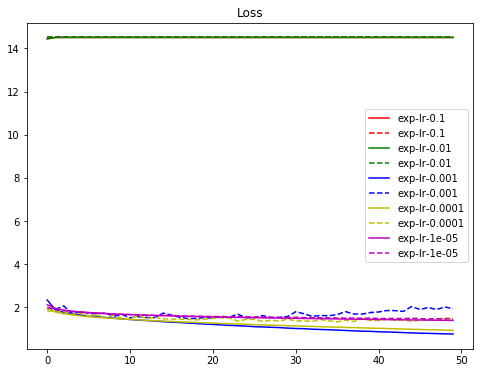

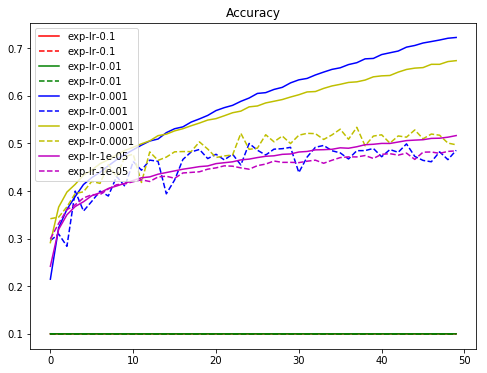

In [14]:
Draw_Result(results_RMSprop)

In [15]:
results_Adagrad = {}
for lr in LEARNING_RATE:
    ch = 2
    Training_model(ch, lr, results_Adagrad)

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 5s 95us/step - loss: 14.4503 - acc: 0.0985 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 5s 91us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 5s 91us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 5s 91us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 5s 91us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 5s 92us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 5s 90us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.

50000/50000 [==============================] - 5s 95us/step - loss: 2.0000 - acc: 0.2863 - val_loss: 2.0459 - val_acc: 0.2555
Epoch 2/50
50000/50000 [==============================] - 5s 91us/step - loss: 1.8149 - acc: 0.3595 - val_loss: 1.7854 - val_acc: 0.3672
Epoch 3/50
50000/50000 [==============================] - 5s 91us/step - loss: 1.7375 - acc: 0.3888 - val_loss: 1.7161 - val_acc: 0.4039
Epoch 4/50
50000/50000 [==============================] - 5s 91us/step - loss: 1.6856 - acc: 0.4075 - val_loss: 1.7255 - val_acc: 0.3736
Epoch 5/50
50000/50000 [==============================] - 5s 91us/step - loss: 1.6465 - acc: 0.4223 - val_loss: 1.6468 - val_acc: 0.4196
Epoch 6/50
50000/50000 [==============================] - 5s 92us/step - loss: 1.6142 - acc: 0.4355 - val_loss: 1.6474 - val_acc: 0.4131
Epoch 7/50
50000/50000 [==============================] - 5s 91us/step - loss: 1.5899 - acc: 0.4441 - val_loss: 1.6233 - val_acc: 0.4229
Epoch 8/50
50000/50000 [============================

Epoch 3/50
50000/50000 [==============================] - 5s 91us/step - loss: 1.9126 - acc: 0.3381 - val_loss: 1.8958 - val_acc: 0.3437
Epoch 4/50
50000/50000 [==============================] - 5s 91us/step - loss: 1.8797 - acc: 0.3505 - val_loss: 1.8697 - val_acc: 0.3505
Epoch 5/50
50000/50000 [==============================] - 5s 91us/step - loss: 1.8578 - acc: 0.3565 - val_loss: 1.8503 - val_acc: 0.3601
Epoch 6/50
50000/50000 [==============================] - 5s 91us/step - loss: 1.8408 - acc: 0.3623 - val_loss: 1.8364 - val_acc: 0.3606
Epoch 7/50
50000/50000 [==============================] - 5s 92us/step - loss: 1.8273 - acc: 0.3665 - val_loss: 1.8251 - val_acc: 0.3696
Epoch 8/50
50000/50000 [==============================] - 5s 92us/step - loss: 1.8157 - acc: 0.3702 - val_loss: 1.8151 - val_acc: 0.3686
Epoch 9/50
50000/50000 [==============================] - 5s 92us/step - loss: 1.8054 - acc: 0.3736 - val_loss: 1.8054 - val_acc: 0.3713
Epoch 10/50
50000/50000 [================

50000/50000 [==============================] - 5s 91us/step - loss: 2.2119 - acc: 0.2100 - val_loss: 2.2057 - val_acc: 0.2133
Epoch 5/50
50000/50000 [==============================] - 5s 91us/step - loss: 2.1972 - acc: 0.2198 - val_loss: 2.1926 - val_acc: 0.2208
Epoch 6/50
50000/50000 [==============================] - 5s 91us/step - loss: 2.1851 - acc: 0.2258 - val_loss: 2.1815 - val_acc: 0.2256
Epoch 7/50
50000/50000 [==============================] - 5s 91us/step - loss: 2.1745 - acc: 0.2296 - val_loss: 2.1717 - val_acc: 0.2269
Epoch 8/50
50000/50000 [==============================] - 5s 91us/step - loss: 2.1652 - acc: 0.2323 - val_loss: 2.1630 - val_acc: 0.2303
Epoch 9/50
50000/50000 [==============================] - 5s 92us/step - loss: 2.1567 - acc: 0.2359 - val_loss: 2.1550 - val_acc: 0.2333
Epoch 10/50
50000/50000 [==============================] - 5s 90us/step - loss: 2.1489 - acc: 0.2388 - val_loss: 2.1475 - val_acc: 0.2375
Epoch 11/50
50000/50000 [==========================

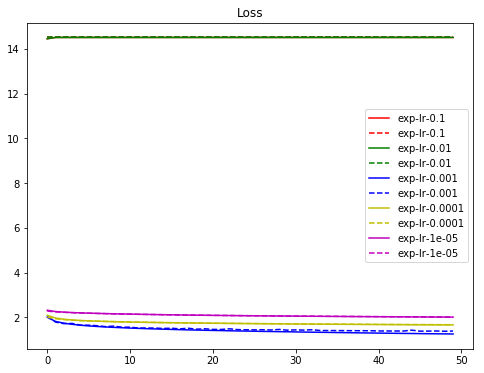

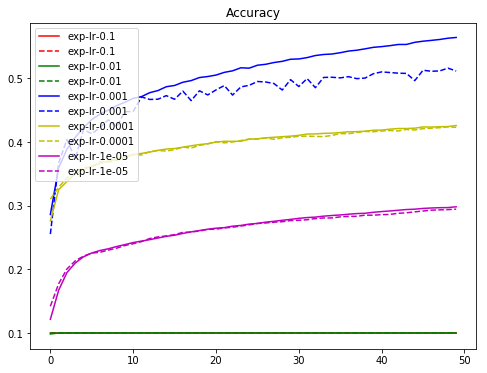

In [16]:
Draw_Result(results_Adagrad)

In [17]:
results_Adam = {}
for lr in LEARNING_RATE:
    ch = 3
    Training_model(ch, lr, results_Adam)

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 6s 117us/step - loss: 14.4423 - acc: 0.1002 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 6s 112us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 6s 112us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 6s 112us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 6s 112us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 6s 112us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 6s 112us/step - loss: 14.5063 - acc: 0.1000 - val_lo

50000/50000 [==============================] - 6s 120us/step - loss: 1.9295 - acc: 0.3072 - val_loss: 1.7479 - val_acc: 0.3679
Epoch 2/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.7002 - acc: 0.3927 - val_loss: 1.6558 - val_acc: 0.4032
Epoch 3/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.6229 - acc: 0.4234 - val_loss: 1.7213 - val_acc: 0.3999
Epoch 4/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.5647 - acc: 0.4431 - val_loss: 1.5573 - val_acc: 0.4486
Epoch 5/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.5121 - acc: 0.4617 - val_loss: 1.5169 - val_acc: 0.4652
Epoch 6/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.4668 - acc: 0.4772 - val_loss: 1.4747 - val_acc: 0.4743
Epoch 7/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.4414 - acc: 0.4853 - val_loss: 1.4572 - val_acc: 0.4797
Epoch 8/50
50000/50000 [=====================

50000/50000 [==============================] - 6s 116us/step - loss: 1.7295 - acc: 0.3903 - val_loss: 1.6982 - val_acc: 0.4102
Epoch 3/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.6435 - acc: 0.4226 - val_loss: 1.5997 - val_acc: 0.4389
Epoch 4/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.5850 - acc: 0.4439 - val_loss: 1.5763 - val_acc: 0.4446
Epoch 5/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.5391 - acc: 0.4595 - val_loss: 1.5401 - val_acc: 0.4527
Epoch 6/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.5021 - acc: 0.4714 - val_loss: 1.5376 - val_acc: 0.4555
Epoch 7/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.4726 - acc: 0.4829 - val_loss: 1.5007 - val_acc: 0.4666
Epoch 8/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.4466 - acc: 0.4909 - val_loss: 1.4563 - val_acc: 0.4896
Epoch 9/50
50000/50000 [=====================

50000/50000 [==============================] - 6s 112us/step - loss: 1.8765 - acc: 0.3486 - val_loss: 1.8497 - val_acc: 0.3566
Epoch 4/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.8259 - acc: 0.3653 - val_loss: 1.8155 - val_acc: 0.3657
Epoch 5/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.7887 - acc: 0.3781 - val_loss: 1.7776 - val_acc: 0.3806
Epoch 6/50
50000/50000 [==============================] - 6s 112us/step - loss: 1.7573 - acc: 0.3880 - val_loss: 1.7476 - val_acc: 0.3889
Epoch 7/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.7306 - acc: 0.3958 - val_loss: 1.7275 - val_acc: 0.3985
Epoch 8/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.7073 - acc: 0.4081 - val_loss: 1.7113 - val_acc: 0.4037
Epoch 9/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.6876 - acc: 0.4138 - val_loss: 1.6872 - val_acc: 0.4135
Epoch 10/50
50000/50000 [====================

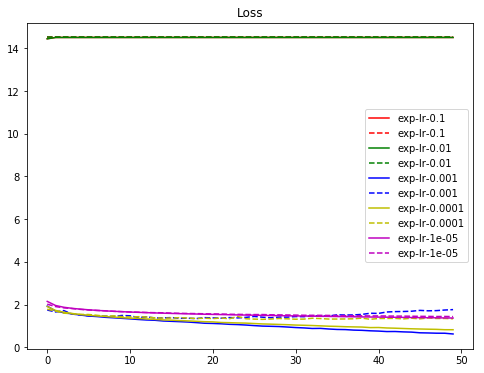

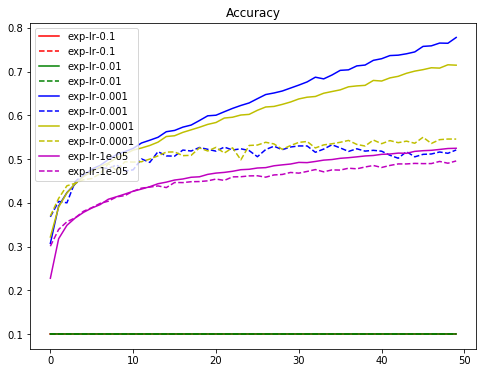

In [18]:
Draw_Result(results_Adam)